

# Project: The Movie Database Analysis
## By Eleojo .E. Adegbe
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#intro">Limitation</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Movie Database is home to a lot of metrics concerning movies. These metrics include the movies budget, revenue, popularity ,title, cast, reviews, runtime etc.
In this project i am working with a dataset that contains 10866 movies. I wish to analyze and point out the best month and day to release Action movies based on total movie revenue for each month and day and also based on the budget used to produce such movie.
## Limitation
The major limitation is that production companies try as much to withold budget for movies and as such it is difficult to get the budget for some movies and also some of the budgets are estimated sums.

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, i load in the data, check for cleanliness and tidiness issues in the data, and then trim and clean the dataset for analysis.Steps are clearly documented and justified.

### General Properties(Inspection)

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('tmdb-movies.csv')
df.head()

#   types and look for instances of missing or possibly errant data.


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**The cell above gives a quick look into our tmdb-movies dataset**

In [3]:
df.shape

(10866, 21)

#### The cell above shows number of rows and columns of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

 #### The above cell gives a look into the variables available in the dataset and their datatype

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### The above cell gives insight into the distribution of the data

In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

**from the cell above we see that our variables of interest _ popularity, revenue, budget and release_date have no missing values so it is safe to just fill up nan values in the dataset  with a 0 so as not to have a NaN type there**

In [7]:
# checking for duplictes
boolean = df.duplicated().any()
#df.duplicated()
boolean

True

### <font color='purple'>Assesment</font>
#### <font color='purple'>Quality issues</font>
- Null values exist in the dataset
- Release year should be changed to datetime type
- Drop duplicates
- Movies with budget less than $\$60000$ and revenue less than $\$368000$

#### <font color='purple'>Tidiness issues</font>
- genre column has more than one variable


### Data Cleaning 
**<font color='purple'>Quality issues</font>**
#### Define
 Fiil up NaN values with 0 and convert the release_date column to datetime check for duplicates and check for movie budget online,
#### Code

In [8]:
df2=df.copy()
# filling Nan with 0
df2 = df.fillna(value=0)
# check if code worked
df2.isnull().sum().sum()

0

In [9]:
# converting release_date to datetime type
df2['release_date']= pd.to_datetime(df2['release_date'])
# check conversion
df2.release_date.dtype

dtype('<M8[ns]')

In [10]:
# remove duplicates
df2.drop_duplicates(keep = False, inplace = True)
# check 
df2.duplicated().any()

False

The code cell above removes duplicates from the dataframe

In [11]:
# Search for where movie budget is less than $60000
movies=df2[df2.budget<60000].original_title.tolist()
# preparing movies list to search for budget online
movies2=[]
for movie in movies:
    new_name=movie.replace(' ','_',)
    movies2.append(new_name)
# movies=[','.join([movie.replace(' ','_') for movie in movies])]
movies2


['Mr._Holmes',
 'Solace',
 'Beyond_the_Reach',
 'Mythica:_The_Darkspore',
 'Me_and_Earl_and_the_Dying_Girl',
 'Equals',
 'Mythica:_The_Necromancer',
 'Alvin_and_the_Chipmunks:_The_Road_Chip',
 'Frozen_Fever',
 'High-Rise',
 'Spooks:_The_Greater_Good',
 'The_Scorpion_King:_The_Lost_Throne',
 'Absolutely_Anything',
 'Everly',
 'Slow_West',
 'Mistress_America',
 'True_Story',
 'Shaun_the_Sheep_Movie',
 'A_Perfect_Day',
 'Z_for_Zachariah',
 "Dragonheart_3:_The_Sorcerer's_Curse",
 'Brothers_of_the_Wind',
 'Regression',
 'Pawn_Sacrifice',
 'The_Man_Who_Knew_Infinity',
 'Pay_the_Ghost',
 'The_Voices',
 'Last_Knights',
 'Miss_You_Already',
 'A_Bigger_Splash',
 'Kidnapping_Mr._Heineken',
 'Kill_Me_Three_Times',
 '45_Years',
 'Barely_Lethal',
 'Macbeth',
 'Extraction',
 "Jenny's_Wedding",
 'Descendants',
 'Tumbledown',
 'Far_from_the_Madding_Crowd',
 'The_End_of_the_Tour',
 'LEGO_DC_Comics_Super_Heroes:_Justice_League_vs._Bizarro_League',
 'Remember',
 'Halo:_The_Fall_of_Reach',
 'Into_the_Fores

In [16]:
# Searching for movie budget online 
import wptools
budget_list=[]
try:
    for movie_title in movies2:
        page = wptools.page(movie_title)
        page=page.get_parse()
        budget=page.data
        if (budget['infobox']  or budget['budget']['infobox']) == None:
            
            budget_list.append(0)
            
        else:
            budget_list.append(budget['infobox']['budget'])
            
except LookupError as e:
        print('PAGE NOT FOUND')
        pass
#         continue

# page=wptools.page('Solace')
# page.get()
# page.data['']

en.wikipedia.org (parse) Mr._Holmes
en.wikipedia.org (imageinfo) File:Mr. Holmes poster.jpg
Mr. Holmes (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Mr. Holme...
  infobox: <dict(20)> name, image, alt, caption, director, produce...
  pageid: 40463536
  parsetree: <str(28184)> <root><template><title>Short description...
  requests: <list(2)> parse, imageinfo
  title: Mr. Holmes
  wikibase: Q17344458
  wikidata_url: https://www.wikidata.org/wiki/Q17344458
  wikitext: <str(21410)> {{Short description|2015 mystery film}}{{...
}
en.wikipedia.org (parse) Solace


PAGE NOT FOUND


Consolation (en) data
{
  iwlinks: <list(2)> https://en.wikiquote.org/wiki/Special:Search/...
  pageid: 41245169
  parsetree: <str(12472)> <root><template><title>other uses</title...
  requests: <list(1)> parse
  title: Consolation
  wikibase: Q1990010
  wikidata_url: https://www.wikidata.org/wiki/Q1990010
  wikitext: <str(9892)> {{other uses}}{{redirect|Solace}}[[File:Co...
}


The code above could only get budget for Movie Mr.Holmes. Movie budget is hard to find online as many production companies dont readily release it.
due to this we will be removing these movies from the dataset as it can lead to misleading insights

the cheapest movie ever made according to google is $The$ $Blair$ $Witch$ at $\$60 000$ so drop all movies with budget below $\$60000$
also the worst revenue a movie got according to google was for the movie $Zyzzyx$ $Road$ at $\$368 000$ but this will not affect our analysis. 


In [12]:
# # drop movies with budget less than 60000 and revenue less than 368000
# df2.drop(df2.index[df2.budget<60000],inplace=True)
# df2.drop(df2.index[df2.revenue<380000],inplace=True)

**<font color='purple'>Tidiness issues</font>**
#### Define
- Extract Action movies from genres column and drop genres column

#### Code

In [13]:
# extract 'Action' from the genres column for analysis later
df2['Action']=df2.genres.str.extract('(Action)',expand=True)
# drop  genres column
df2.drop('genres',axis=1)
# drop nan values in Action column
df2 = df2.dropna()
# check 'Action' column
df2.Action.unique()

array(['Action'], dtype=object)

In [14]:
df2.shape

(2383, 22)

In [15]:
# extract release_month and day from release_date column
df2['month']=df2.release_date.dt.strftime('%b')
df2['day']=df2.release_date.dt.strftime('%A')

In [40]:
df2.day

0          Tuesday
1        Wednesday
3          Tuesday
4        Wednesday
6          Tuesday
           ...    
10850      Tuesday
10851      Tuesday
10857     Thursday
10862      Tuesday
10864      Tuesday
Name: day, Length: 2383, dtype: object

<a id='eda'></a>
## Exploratory Data Analysis
### Univariate

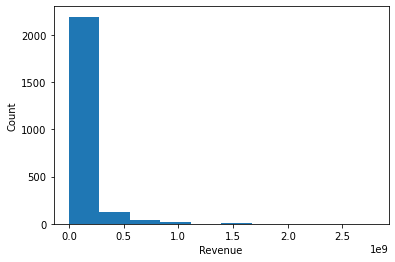

In [44]:
plt.hist(data=df2,x='revenue');
plt.xlabel('Revenue');
plt.ylabel('Count');

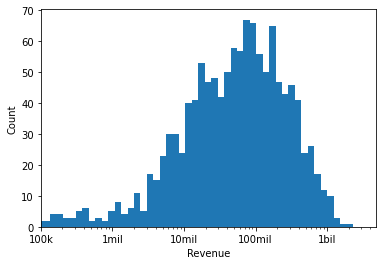

In [51]:
size=(df2.revenue.max()-df2.revenue.min())/100
bins = 10**np.arange(df2.revenue.min(),np.log10(df2.revenue.max()),0.09)
plt.hist(data=df2,x='revenue',bins=bins);
plt.xscale('log');
plt.xlim(10**5,df2.revenue.max()+2*10**9);
plt.xlabel('Revenue');
plt.ylabel('Count');
xloc=[100000,1000000,10000000,100000000,1000000000]
xlabel=['100k','1mil','10mil','100mil','1bil']
plt.xticks(xloc,xlabel);


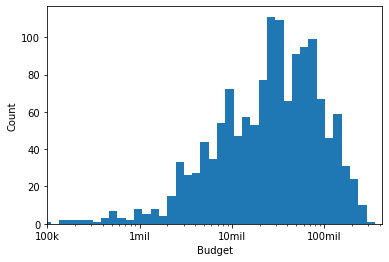

In [56]:
bins = 10**np.arange(df2.budget.min(),np.log10(df2.budget.max()),0.09)

plt.hist(data=df2,x='budget',bins=bins);
plt.xscale('log');
plt.xlim(10**5,df2.budget.max());
plt.xlabel('Budget');
plt.ylabel('Count');
xloc=[100000,1000000,10000000,100000000]
xlabel=['100k','1mil','10mil','100mil']
plt.xticks(xloc,xlabel);

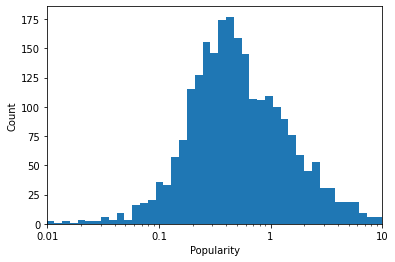

In [57]:
size = (df2.popularity.max()-df2.popularity.min())/20
bins = 10**np.arange(np.log10(df2.popularity.min()),np.log10(df2.popularity.max()),0.07)
plt.hist(data=df2,x='popularity',bins=bins);

plt.xscale('log')
plt.xlim(10**-2,10);
xloc=[0.01,0.1,1,10]
xlabel=['{}'.format(v) for v in xloc]
plt.xticks(xloc,xlabel);

**Revenue and budget and popularity takes on an almost unimodal nature when plotted on the log scale**

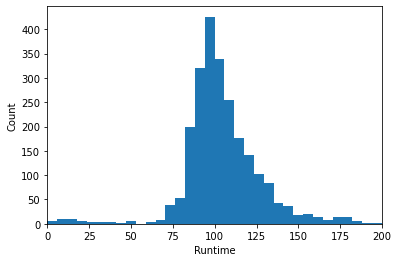

In [58]:
size=(df2.runtime.max()-df2.runtime.min())/120
bins=np.arange(df2.runtime.min(),df2.runtime.max(),size)
plt.hist(data=df2,x='runtime',bins=bins);
plt.xlim(0,200);
plt.xlabel('Runtime');
plt.ylabel('Count');

Runtime has a unimodal distribution

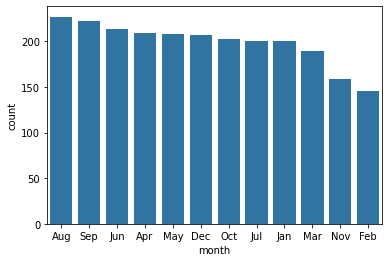

In [35]:
order=df2.month.value_counts().index
color=sb.color_palette()[0]
sb.countplot(data=df2,x='month',color=color,order=order);
# df2.month

This plot shows the distribution of movie releases based on month with August having the most release of movies

### Bivariate Exploration

##### Reveue Vs Runtime

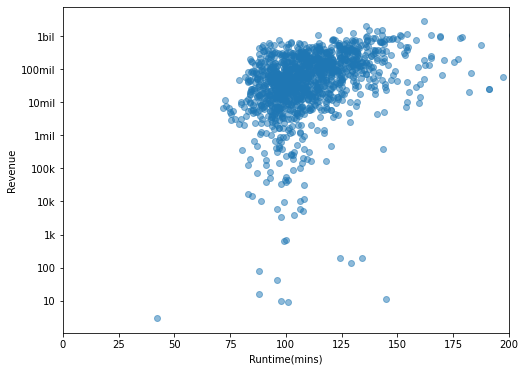

In [89]:
plt.figure(figsize=[8,6])
sb.regplot(data=df2,x='runtime',y='revenue',fit_reg=False,x_jitter=0.3,scatter_kws={'alpha':0.5});
# plt.xlim(50,200);
# plt.ylim(0,1.5*10**9)
plt.yscale('log');
# plt.xscale('log');
yloc=[10,100,1000,10000,100000,1000000,10000000,100000000,1000000000]
ylabel=['10','100','1k','10k','100k','1mil','10mil','100mil','1bil']
plt.yticks(yloc,ylabel);
plt.xlim(0,200);
plt.xlabel('Runtime(mins)');
plt.ylabel('Revenue');

This cell shows that most movies have a duration around 100mins(1hr:15mins) with a revenue congested around $\$1million$ to about $\$500million$ but we dont really understand yet why revenue is increasing. Perhaps a closer look at revenue with another variable will shed some more light.


##### Revenue Vs Budget

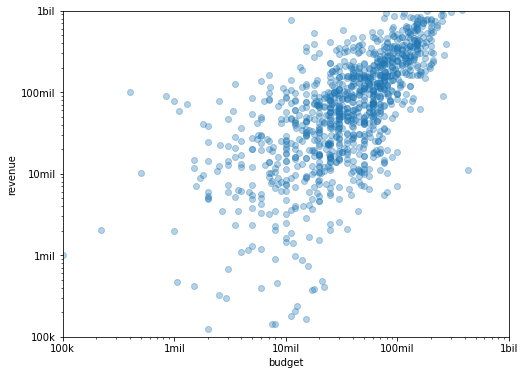

In [60]:
plt.figure(figsize=[8,6])

sb.regplot(data=df2,x='budget',y='revenue',fit_reg=False,scatter_kws={'alpha':1/3});
plt.xscale('log');
plt.yscale('log');
plt.xlim(10**5,10**9);
plt.ylim(10**5,10**9)
xloc=[100000,1000000,10000000,100000000,1000000000]
xlabel=['100k','1mil','10mil','100mil','1bil']
yloc=[100000,1000000,10000000,100000000,1000000000]
ylabel=['100k','1mil','10mil','100mil','1bil']
plt.xticks(xloc,xlabel);
plt.yticks(xloc,xlabel);

Here we begin to see a kind of trend from budget of about $\$10million$  and above . With an increase in budget comes a gentle steady increase in revenue.

**Revenue Vs Popularity**

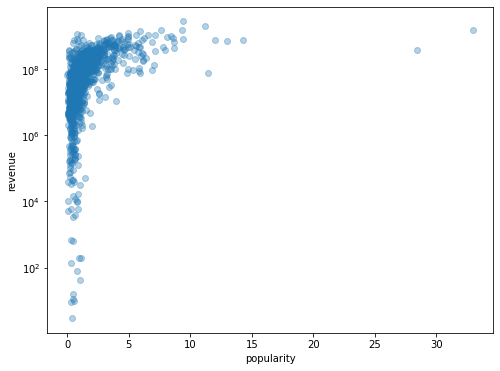

In [38]:
plt.figure(figsize=[8,6])

sb.regplot(data=df2,x='popularity',y='revenue',fit_reg=False,scatter_kws={'alpha':1/3});
# plt.xscale('log');
plt.yscale('log');
# plt.xlim(10**5,10**9);

There is no clear correlation between revenue and popularity

#### Revenue Vs Month

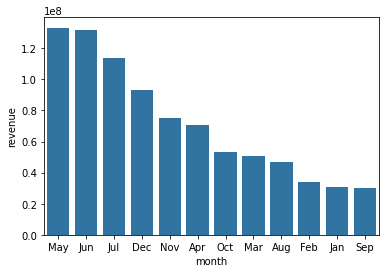

In [39]:
color=sb.color_palette()[0]
order=df2.groupby('month').mean()['revenue'].sort_values(ascending=False).index.tolist()
sb.barplot(data=df2,x='month',y='revenue',color=color,ci=None,order=order);
# plt.yscale('log')
# order

May and June have the highest mean revenues even though they dont have the highest number of releases.August had the highest number of releases but is fouth to the last in revenues.

#### Revenue Vs Day

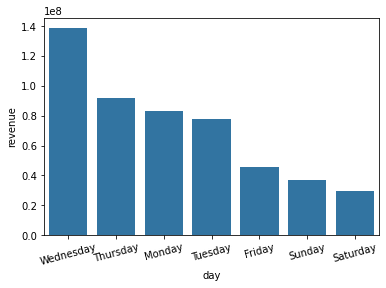

In [43]:
order=df2.groupby('day').mean()['revenue'].sort_values(ascending=False).index.tolist()
sb.barplot(data=df2,x='day',y='revenue',color=color,ci=None,order=order);
plt.xticks(rotation=15);

This plot shows that wednesdays have the highest revenue.

***Revenue Vs Month Vs Day***

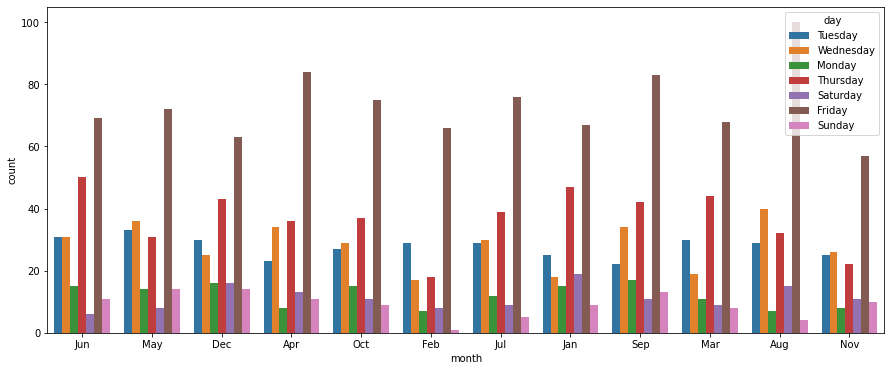

In [65]:
plt.figure(figsize=[15,6])
sb.countplot(data=df2,x='month',hue='day');

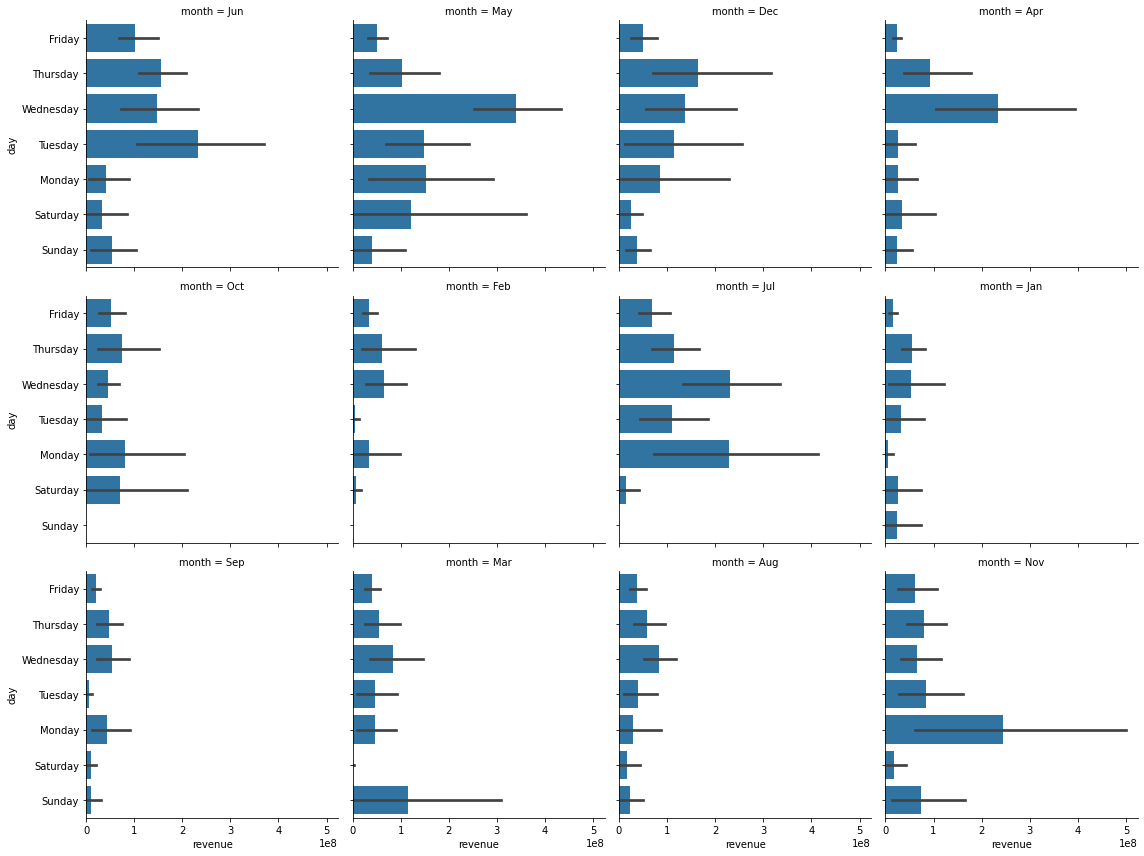

In [83]:
order=df2.day.value_counts().index

g=sb.FacetGrid(data=df2, col='month', height=4 ,col_wrap=4,);
g.map(sb.barplot,'revenue','day',order=order);


> This first plot above clearly shows that Fridays in August has the highest release of Action movies but the second plot shows that Wednesdays in May have the produce the highest revenues in average.

<a id='conclusions'></a>
## Conclusions

    From the analysis made on the movie database on when to release Action movies with the Revenue as the determining factor(variable) it is advisory to release an Action Movie in May and preferably on a Wednesday as this month proves to produce the heighest revenue of over 160m dollars over the years from 1966 -2015. It will also do good to spend heavily in action movies as shown by the analysis over the years in other to get more revenue as there is a correlation between between budget and revenue. 
